In [11]:
import tensorflow as tf
import numpy as np
import string

# Poems data
poems = [
    "Under the moonlit sky they stand,Whispering secrets of the land,The pines, they sway, a gentle breeze,Telling tales to stars with ease,In their shadows, dreams take flight,Guided by the softest light,In the quiet, nature speaks, Through the pines, our spirit seeks.",

    " Upon the shore, the waves embrace, A timeless rhythm, steady pace, Whispers of an endless sea, Calling out to you and me, Each wave a memory, each tide a song, Of love and loss, both weak and strong, In every crash, a moment passed, Yet still the sea’s call will forever last.",

    "The fireflies dance in twilight's hue,Their golden light, a fleeting view.Among the trees, they swirl and play,Chasing the remnants of the day, In their glow, the night is bright, A canvas filled with sparks of light, Silent music fills the air, A fleeting joy beyond compare.",

    "The mountains sit in quiet grace, A timeless monument, a still embrace, Their peaks pierce through clouds of white, Standing strong, eternal might, They’ve watched the world for centuries past, Silent keepers, still and vast, In their calm, the world finds peace, A place where troubles seem to cease.",


    "Winter's breath, so cold and clear, Turns the world to crystal cheer, Snowflakes fall, a soft ballet, Frosted whispers greet the day, In the hush of snow-filled air, There's magic woven everywhere, In winter’s grip, the heart feels light, A quiet joy in frosty night."
]

In [12]:
# Preprocess the data
def preprocess(poems):
    text = ' '.join(poems)
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    vocab = sorted(set(text))
    char2idx = {u: i for i, u in enumerate(vocab)}
    idx2char = np.array(vocab)

    text_as_int = np.array([char2idx[c] for c in text])
    return text, vocab, char2idx, idx2char, text_as_int

text, vocab, char2idx, idx2char, text_as_int = preprocess(poems)

In [13]:
# Create training sequences
seq_length = 20
examples_per_epoch = len(text)//seq_length

char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    input_text = chunk[:-1]
    target_text = chunk[1:]
    return input_text, target_text

dataset = sequences.map(split_input_target)


In [14]:
# Batch size
BATCH_SIZE = 10
BUFFER_SIZE = 10000

dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [15]:
# Build the model
vocab_size = len(vocab)
embedding_dim = 256
rnn_units = 1024

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    tf.keras.layers.LSTM(rnn_units, return_sequences=True, stateful=False, recurrent_initializer='glorot_uniform'),
    tf.keras.layers.Dense(vocab_size)
])

In [16]:
# Compile the model
def loss(labels, logits):
    return tf.keras.losses.sparse_categorical_crossentropy(labels, logits, from_logits=True)

model.compile(optimizer='adam', loss=loss)

In [17]:
# Ensure the dataset is batched correctly and set to repeat
dataset = dataset.repeat()  # Repeat the dataset indefinitely

# Check the shape of a single batch to ensure it's being created properly
for input_example, target_example in dataset.take(1):
    print("Input batch shape:", input_example.shape)
    print("Target batch shape:", target_example.shape)

# Calculate total number of characters in the text
total_chars = len(text)

# Calculate steps per epoch (number of batches per epoch)
steps_per_epoch = total_chars // (BATCH_SIZE * seq_length)
if steps_per_epoch == 0:
    raise ValueError("Not enough data to create a single step. Consider reducing BATCH_SIZE or seq_length.")

# Train the model
EPOCHS = 30
model.fit(dataset, epochs=EPOCHS, steps_per_epoch=steps_per_epoch)

Input batch shape: (10, 20)
Target batch shape: (10, 20)
Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 625ms/step - loss: 3.2370
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 487ms/step - loss: 3.0388
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 510ms/step - loss: 2.9160
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 499ms/step - loss: 2.8426
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 679ms/step - loss: 2.7993
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - loss: 2.7331
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 491ms/step - loss: 2.6475
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 488ms/step - loss: 2.5202
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 741ms/step - loss: 2.4559
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step - loss: 2.3587
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 488ms/step - loss: 2.2693
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 508ms/step - loss: 2.1792
Epoch 13/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 643ms/step - loss: 2.0729
Epoch 14/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 524ms/step - loss: 2.0082
Epoch 15/30
6/6 ━━━━━━━━━━━━

Epoch 1/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.2661
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 875ms/step - loss: 0.2566
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 892ms/step - loss: 0.2353
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 528ms/step - loss: 0.2115
Epoch 5/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step - loss: 0.2248
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 478ms/step - loss: 0.1930
Epoch 7/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 549ms/step - loss: 0.1883
Epoch 8/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 633ms/step - loss: 0.1814
Epoch 9/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 478ms/step - loss: 0.1706
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 480ms/step - loss: 0.1640
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 485ms/step - loss: 0.1644
Epoch 12/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 747ms/step - loss: 0.1498
Epoch 13/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 489ms/step - loss: 0.1372
Epoch 14/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 489ms/step - loss: 0.1448
Epoch 15/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 483ms/step - loss: 0.1446
Epoch 16/30
6/6 ━━━━━━

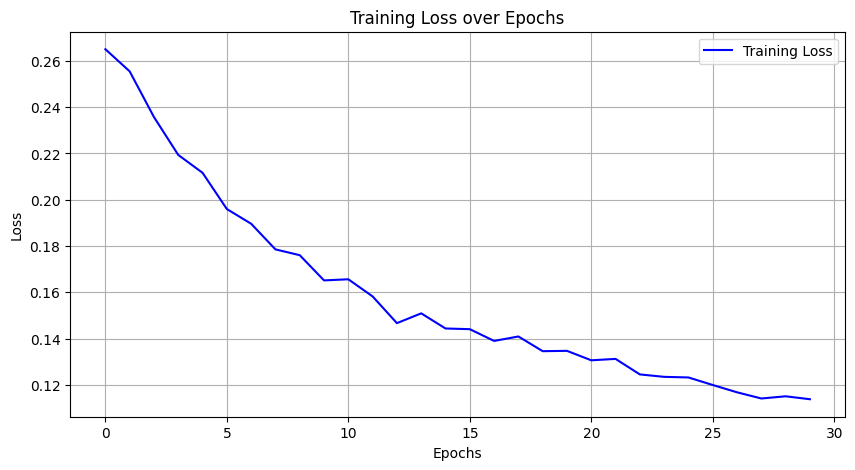

In [18]:
import matplotlib.pyplot as plt

# Assuming you have a history object from model.fit
history = model.fit(dataset, epochs=EPOCHS, steps_per_epoch=steps_per_epoch)

# Plotting the loss curves
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [21]:
def generate_text(model, start_string):
    num_generate = 1000
    input_eval = [char2idx[s] for s in start_string.lower()]
    input_eval = tf.expand_dims(input_eval, 0)

    text_generated = []
    temperature = 0.8  # Control the randomness of predictions

    # No need to reset states for stateless model
    for i in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0)
        predictions = predictions / temperature  # Scale predictions

        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()

        input_eval = tf.expand_dims([predicted_id], 0)  # Prepare input for the next prediction
        text_generated.append(idx2char[predicted_id])  # Append predicted character to output

    return (start_string + ''.join(text_generated))

# Example of generating a poem
print(generate_text(model, start_string="Winter"))

Winterlingom cay pesssilenda pay swaswacassingililole ssstame tresileda ndasstresssswomtasesta tresswa ssinday tasseswassssin s njome wame swre sway wa tressss s sswole pasinva tasedama pa ngimpa se ssss tay cay finva trilile campe talesss sway sitraswmpesssssta stresilica sstame pa swamolingildspas pass tassenta walemba tamo ndimole camaswhes camomedassstaswa fita ssss pa ta ta whed ta ta tramampasswaswame waswfilole thente palimwililimo ssse ca camoly filesssssss tre creday singililesssswfimpe fililes ssilita tassspasstrolinvampaswhe tres tresilililile s pesswa stasstay wa swaswimpa ta nda pes aswa whtreswole nva fimpaswhedasthe tasstaleswfoy spas swasime pe swa asswilesta tredamwfingilempampaswamle ta s sspesssssse fica folitasetay ngilesssswitrasssindas taswhefleeswhea filine sssitamassstre fole pasile tresswa ta tre trililesimpasesil y ssile s ca passssswhe taspeaswo tasswfamestre casileswaswhess ss s file nvasie s sinva swo swaswinghe pas tasinghetamwame casssitamimamsime swasssw